# Predicting the max temperatures for any given day.

I'm going to go through various steps to initialize and validate my model to try and acheive the lowest MSE possible.
### Data is downloaded from visualcrossing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Training and Validation

In [17]:
df = pd.read_csv("alice_train.csv", 
                low_memory=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2139 non-null   object 
 1   Location       2139 non-null   object 
 2   MinTemp        2138 non-null   float64
 3   MaxTemp        2139 non-null   float64
 4   Rainfall       2139 non-null   float64
 5   Evaporation    2110 non-null   float64
 6   Sunshine       2072 non-null   float64
 7   WindGustDir    2096 non-null   object 
 8   WindGustSpeed  2096 non-null   float64
 9   WindDir9am     1987 non-null   object 
 10  WindDir3pm     2136 non-null   object 
 11  WindSpeed9am   2137 non-null   float64
 12  WindSpeed3pm   2137 non-null   float64
 13  Humidity9am    2138 non-null   float64
 14  Humidity3pm    2135 non-null   float64
 15  Pressure9am    2138 non-null   float64
 16  Pressure3pm    2136 non-null   float64
 17  Cloud9am       2108 non-null   float64
 18  Cloud3pm

In [19]:
###Lists number of missing points of data per variable
df.isna().sum()

Date               0
Location           0
MinTemp            1
MaxTemp            0
Rainfall           0
Evaporation       29
Sunshine          67
WindGustDir       43
WindGustSpeed     43
WindDir9am       152
WindDir3pm         3
WindSpeed9am       2
WindSpeed3pm       2
Humidity9am        1
Humidity3pm        4
Pressure9am        1
Pressure3pm        3
Cloud9am          31
Cloud3pm          93
Temp9am            0
Temp3pm            2
RainToday          0
RainTomorrow       0
dtype: int64

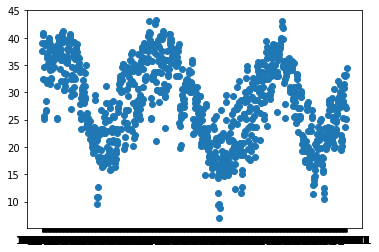

In [20]:
fig, ax = plt.subplots()
ax.scatter(df["Date"][:1000], df["MaxTemp"][:1000])

<AxesSubplot:ylabel='Frequency'>

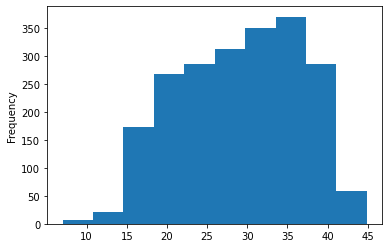

In [21]:
df.MaxTemp.plot.hist()

### Parsing
#### Parsing dates in colums through pandas for trends 

In [22]:
df = pd.read_csv("alice_train.csv", 
                low_memory=False,
                parse_dates=["Date"])

In [23]:
df.Date.dtypes

dtype('<M8[ns]')

In [25]:
df.Date

0      2008-12-01
1      2008-12-02
2      2008-12-03
3      2008-12-04
4      2008-12-05
          ...    
2134   2015-01-02
2135   2015-01-03
2136   2015-01-04
2137   2015-01-05
2138   2015-01-06
Name: Date, Length: 2139, dtype: datetime64[ns]

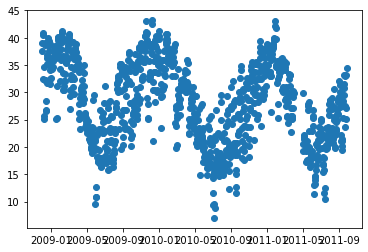

In [24]:
fig, ax = plt.subplots()
ax.scatter(df["Date"][:1000], df["MaxTemp"][:1000])

In [26]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,AliceSprings,19.6,37.6,0.0,11.2,9.8,WNW,87.0,NNE,...,17.0,16.0,1010.5,1005.8,0.0,3.0,30.4,37.2,No,Yes
1,2008-12-02,AliceSprings,21.0,39.1,1.2,9.0,12.2,NNW,41.0,NNW,...,18.0,13.0,1009.3,1004.6,2.0,5.0,32.5,38.2,Yes,No
2,2008-12-03,AliceSprings,22.9,40.9,0.0,11.6,12.6,NNW,48.0,ENE,...,17.0,11.0,1006.3,1003.4,0.0,3.0,35.0,40.4,No,No
3,2008-12-04,AliceSprings,24.7,40.5,0.0,16.0,7.8,WNW,72.0,SSW,...,29.0,24.0,1008.7,1006.9,3.0,6.0,32.3,36.5,No,No
4,2008-12-05,AliceSprings,23.4,32.4,0.2,12.2,4.1,SSW,46.0,S,...,58.0,43.0,1014.0,1010.7,7.0,6.0,26.8,31.1,No,Yes


In [28]:
df.head().T

,0,1,2,3,4
Date,2008-12-01 00:00:00,2008-12-02 00:00:00,2008-12-03 00:00:00,2008-12-04 00:00:00,2008-12-05 00:00:00
Location,AliceSprings,AliceSprings,AliceSprings,AliceSprings,AliceSprings
MinTemp,19.6,21.0,22.9,24.7,23.4
MaxTemp,37.6,39.1,40.9,40.5,32.4
Rainfall,0.0,1.2,0.0,0.0,0.2
Evaporation,11.2,9.0,11.6,16.0,12.2
Sunshine,9.8,12.2,12.6,7.8,4.1
WindGustDir,WNW,NNW,NNW,WNW,SSW
WindGustSpeed,87.0,41.0,48.0,72.0,46.0
WindDir9am,NNE,NNW,ENE,SSW,S


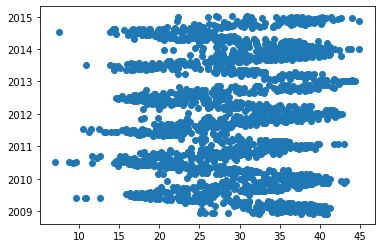

In [30]:
fig, ax = plt.subplots()
ax.scatter(df["MaxTemp"], df["Date"])

In [33]:
df.sort_values(by=["Date"], inplace=True, ascending=True)

In [34]:
df.Date.head(20)

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
5    2008-12-06
6    2008-12-07
7    2008-12-08
8    2008-12-09
9    2008-12-10
10   2008-12-11
11   2008-12-12
12   2008-12-13
13   2008-12-14
14   2008-12-15
15   2008-12-16
16   2008-12-17
17   2008-12-18
18   2008-12-19
19   2008-12-20
Name: Date, dtype: datetime64[ns]

In [35]:
df_cop = df.copy()

In [38]:
df_cop.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,2008-12-01 00:00:00,2008-12-02 00:00:00,2008-12-03 00:00:00,2008-12-04 00:00:00,2008-12-05 00:00:00,2008-12-06 00:00:00,2008-12-07 00:00:00,2008-12-08 00:00:00,2008-12-09 00:00:00,2008-12-10 00:00:00
Location,AliceSprings,AliceSprings,AliceSprings,AliceSprings,AliceSprings,AliceSprings,AliceSprings,AliceSprings,AliceSprings,AliceSprings
MinTemp,19.6,21.0,22.9,24.7,23.4,21.7,20.9,17.7,24.4,25.3
MaxTemp,37.6,39.1,40.9,40.5,32.4,25.1,25.7,34.6,39.0,38.6
Rainfall,0.0,1.2,0.0,0.0,0.2,2.6,4.8,0.6,0.0,0.0
Evaporation,11.2,9.0,11.6,16.0,12.2,8.4,4.6,3.0,8.0,11.8
Sunshine,9.8,12.2,12.6,7.8,4.1,0.2,2.1,12.2,11.0,8.7
WindGustDir,WNW,NNW,NNW,WNW,SSW,SSE,N,E,S,W
WindGustSpeed,87.0,41.0,48.0,72.0,46.0,35.0,31.0,26.0,50.0,54.0
WindDir9am,NNE,NNW,ENE,SSW,S,SSW,SSW,ENE,N,NNE
